In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df_train= pd.read_csv('Linguipedia_CodeFest\\train.csv')
df_test = pd.read_csv('Linguipedia_CodeFest\\test.csv')
df_train.head()


,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [22]:
df_test.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


In [23]:
##Join the test and trian data
df =pd.concat([df_train, df_test])
df.head()

,id,label,tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...


In [24]:
##Clean the Data

#Convert to Lower Case
#df['tweet'] = df['tweet'].str.strip('tweet').str.lower()
#df['tweet']= df['tweet'].apply(lambda tweet: tweet.strip().lower())

#df['tweet_new'] = map(lambda x: x.replace("URLs","URL"), df['tweet'])
#Removing URLs and # with 'hastag'
df['tweet_clean'] = df['tweet'].str.replace('http\S+|www.\S+', 'URL', case=False)
df['tweet_clean'] = df['tweet'].str.replace('#', 'hashtag', case=False)
df.head()

,id,label,tweet,tweet_clean
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,hashtagfingerprint hashtagPregnancy Test https...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case ^^ Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...,We love this! Would you go? hashtagtalk hashta...
3,4,0.0,I'm wired I know I'm George I was made that wa...,I'm wired I know I'm George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service! Apple won't even talk to...


In [34]:
df = df.drop(columns="tweet_new")
df.head()

,id,label,tweet,tweet_clean
0,1,0.0,#fingerprint #pregnancy test https://goo.gl/h1...,hashtagfingerprint hashtagpregnancy test https...
1,2,0.0,finally a transparant silicon case ^^ thanks t...,finally a transparant silicon case thanks t...
2,3,0.0,we love this! would you go? #talk #makememorie...,we love this would you go hashtagtalk hashta...
3,4,0.0,i'm wired i know i'm george i was made that wa...,i m wired i know i m george i was made that wa...
4,5,1.0,what amazing service! apple won't even talk to...,what amazing service apple won t even talk to...


In [25]:
#Remove pattern
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

#Remove twitter handles (@user)
df['tweet_clean'] = np.vectorize(remove_pattern)(df['tweet_clean'], "@[\w]*")

#Remove special character, Punctuations and numbers
df['tweet_clean'] = df['tweet_clean'].str.replace("[^a-zA-Z#]", " ")

df.head()

,id,label,tweet,tweet_clean
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,hashtagfingerprint hashtagPregnancy Test https...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...,We love this Would you go hashtagtalk hashta...
3,4,0.0,I'm wired I know I'm George I was made that wa...,I m wired I know I m George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service Apple won t even talk to...


In [26]:
#Remove more than two space with one space
df['tweet_clean'] = np.vectorize(remove_pattern)(df['tweet_clean'], "\.\.+")
df.head()

,id,label,tweet,tweet_clean
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,hashtagfingerprint hashtagPregnancy Test https...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...,We love this Would you go hashtagtalk hashta...
3,4,0.0,I'm wired I know I'm George I was made that wa...,I m wired I know I m George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service Apple won t even talk to...


In [27]:
#Converted more than 2 letter repetitions to 2 letter
def ReplaceThreeOrMore(s):
    # pattern to look for three or more repetitions of any character, including
    # newlines.
    pattern = re.compile(r"(.)\1{2,}", re.DOTALL) 
    return pattern.sub(r"\1\1", s)

df['tweet_clean'] = np.vectorize(ReplaceThreeOrMore)(df['tweet_clean'])
df.head()

,id,label,tweet,tweet_clean
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,hashtagfingerprint hashtagPregnancy Test https...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case Thanks to ...
2,3,0.0,We love this! Would you go? #talk #makememorie...,We love this Would you go hashtagtalk hashta...
3,4,0.0,I'm wired I know I'm George I was made that wa...,I m wired I know I m George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service Apple won t even talk to...


In [28]:
#Removing Short Words
df['tweet_clean'] = df['tweet_clean'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,tweet_clean
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,hashtagfingerprint hashtagPregnancy Test https...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally transparant silicon case Thanks uncle ...
2,3,0.0,We love this! Would you go? #talk #makememorie...,love this Would hashtagtalk hashtagmakememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...,wired know George made that hashtagiphone hash...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service Apple even talk about que...


In [29]:
#Tokenization (Split a string of texts into tokens)
df['tokenized_tweet'] = df['tweet_clean'].apply(lambda x: x.split())
df.head()

,id,label,tweet,tweet_clean,tokenized_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,hashtagfingerprint hashtagPregnancy Test https...,"[hashtagfingerprint, hashtagPregnancy, Test, h..."
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally transparant silicon case Thanks uncle ...,"[Finally, transparant, silicon, case, Thanks, ..."
2,3,0.0,We love this! Would you go? #talk #makememorie...,love this Would hashtagtalk hashtagmakememorie...,"[love, this, Would, hashtagtalk, hashtagmakeme..."
3,4,0.0,I'm wired I know I'm George I was made that wa...,wired know George made that hashtagiphone hash...,"[wired, know, George, made, that, hashtagiphon..."
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service Apple even talk about que...,"[What, amazing, service, Apple, even, talk, ab..."


In [30]:
#Stemming process [stripping the suffixes ('ing', 'ly', 'es', 's')]
from nltk.stem.porter import *
stemmer = PorterStemmer()

df['tokenized_tweet'] = df['tokenized_tweet'].apply(lambda x: [stemmer.stem(i) for i in x]) 
df.head()

,id,label,tweet,tweet_clean,tokenized_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,hashtagfingerprint hashtagPregnancy Test https...,"[hashtagfingerprint, hashtagpregn, test, http,..."
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally transparant silicon case Thanks uncle ...,"[final, transpar, silicon, case, thank, uncl, ..."
2,3,0.0,We love this! Would you go? #talk #makememorie...,love this Would hashtagtalk hashtagmakememorie...,"[love, thi, would, hashtagtalk, hashtagmakemem..."
3,4,0.0,I'm wired I know I'm George I was made that wa...,wired know George made that hashtagiphone hash...,"[wire, know, georg, made, that, hashtagiphon, ..."
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service Apple even talk about que...,"[what, amaz, servic, appl, even, talk, about, ..."


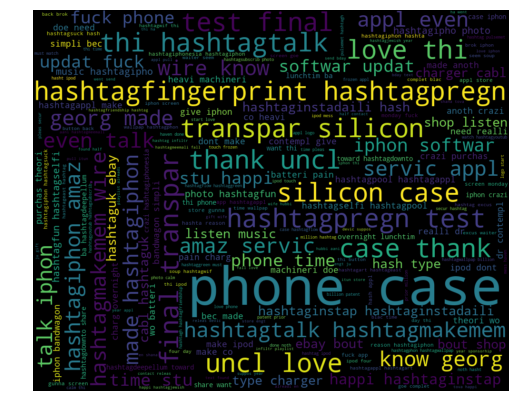

In [36]:
#Remove the symbols like ' and -
df['tokenized_tweet_test']= re.sub("[^a-zA-Z]"," ", str(df['tokenized_tweet']))
#df.head()

#Plot the common word using word cloud

#all_words = '\n'.join(''.join(elems) for elems in df['tokenized_tweet'])
all_words = ','.join(str(v) for v in df['tokenized_tweet_test'])
                      
#from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=800, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [37]:
#Extracting #hashtag from the tweet

# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"hashtag(\w+)", i)
        hashtags.append(ht)

    return hashtags

#Extracting negative hashtags from tweets
HT_negative = hashtag_extract(df['tokenized_tweet_test'][df['label'] == 0])

#Extracting positive hashtags tweets
HT_positive = hashtag_extract(df['tokenized_tweet_test'][df['label'] == 1])

# unnesting list
HT_negative = sum(HT_negative,[])
HT_positive = sum(HT_positive,[])

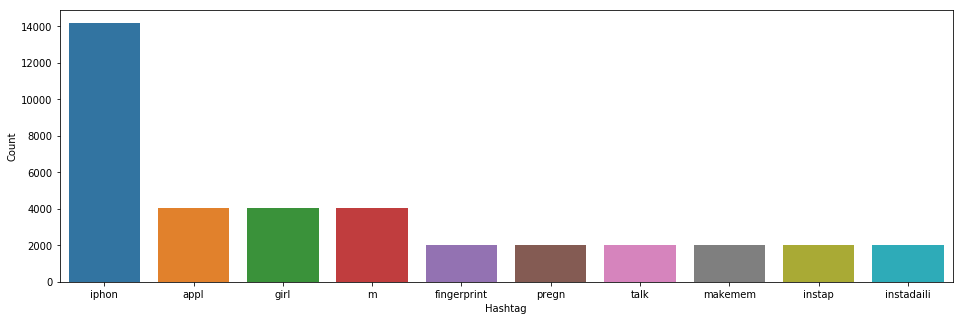

In [40]:
#Plot histogram fro hashtag
import nltk
import seaborn as sns
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()


In [43]:
#Feacture Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

#df['tokenized_tweet_test_tok']= re.sub("[^a-zA-Z]"," ", df['tokenized_tweet'])
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

df['tokenized_tweet']=[" ".join(review) for review in df['tokenized_tweet'].values]
tfidf = tfidf_vectorizer.fit_transform(df['tokenized_tweet'])


In [47]:
#Split the data
train_tfidf = tfidf[:len(df_train)]
test_tfidf = tfidf[len(df_train):]

In [53]:
#Building the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report


#Splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_tfidf, train['label'], random_state=42, test_size=0.3)


#Training the model
model = LogisticRegression()
model.fit(xtrain_bow, ytrain)


xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

model.fit(xtrain_tfidf, ytrain)

prediction = model.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)



#Accuracies
train_acc= model.score(xtrain_bow, ytrain)
test_acc= accuracy_score(yvalid, prediction_int)

print('Training accuracy: {}' .format(train_acc))
print('Testing accuracy: {}' .format(test_acc))

print("F1_Score is:", f1_score(yvalid, prediction_int))

#Classification Report
print('Classification Report: ')
print(classification_report(yvalid, prediction_int))

Training accuracy: 0.9123376623376623
Testing accuracy: 0.8939393939393939
F1_Score is: 0.8235294117647058
Classification Report: 
             precision    recall  f1-score   support

        0.0       0.97      0.89      0.92      1735
        1.0       0.75      0.92      0.82       641

avg / total       0.91      0.89      0.90      2376

